# Learning Deep Learning 02: Logistic Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import torch
from torch import nn

## Why not linear regression?

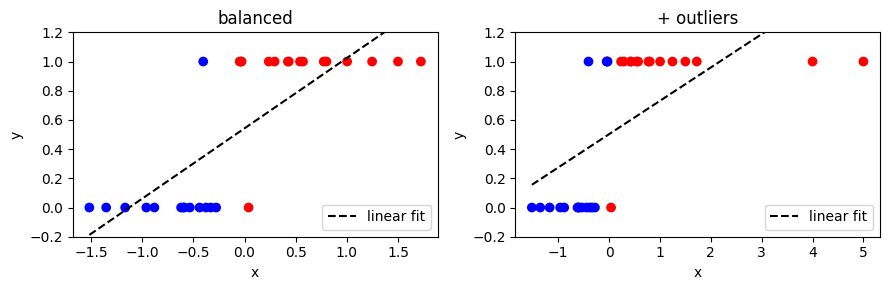

In [2]:
def fit_and_plot(x, y, title="", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    yhat = lr.predict(x.reshape(-1, 1))
    ax.scatter(x, y, c=yhat >= 0.5, cmap="bwr")
    ax.plot(x, yhat, "k--", label="linear fit")
    ax.set_ylim([-0.2, 1.2])
    ax.legend(loc="lower right")
    ax.set_ylabel("y")
    ax.set_xlabel("x")
    ax.set_title(title)


xy = np.loadtxt("../data/02_dummy_data.csv")
x = xy[:, 0]
y = xy[:, 1]

fig, ax = plt.subplots(1, 2, figsize=(9, 3))
fit_and_plot(x, y, title="balanced", ax=ax[0])
fit_and_plot(np.append(x, [4, 5]), np.append(y, [1, 1]), title="+ outliers", ax=ax[1])
fig.tight_layout()

## Sigmoid

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


Text(0, 0.5, 'sigmoid(z)')

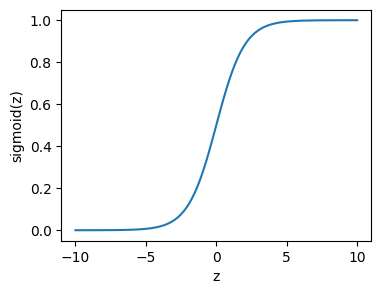

In [4]:
z = np.linspace(-10, 10, 100)
plt.figure(figsize=(4,3))
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")

## Loss Function

## Neural Network for Logistic Regression

- activation function

## Pytorch

In [5]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1),
    nn.Sigmoid()
)
print(model)

loss_fn = nn.BCELoss()

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


> This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.

In [6]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1),
)
print(model)

loss_fn = nn.BCEWithLogitsLoss()

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
def train(X, y, model, loss_fn, optimizer, epochs):
    loss_history = []
    for e in range(epochs):
        # Compute prediction and loss
        pred = model(X)
        loss_value = loss_fn(pred, y)
        loss_history.append(float(loss_value))

        # Backpropagation
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

    print("Done!")
    return model, loss_history

In [9]:
x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
x = x[:, None]
y = y[:, None]  # output needs to be 2D, [:, None] adds a second (length 1) axis

In [10]:
model, loss_history = train(x, y, model, loss_fn, optimizer, 15000)

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:]} \n")


Done!
Layer: 0.weight | Size: torch.Size([1, 1]) | Values : tensor([[5.4281]], grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([1]) | Values : tensor([0.8135], grad_fn=<SliceBackward0>) 



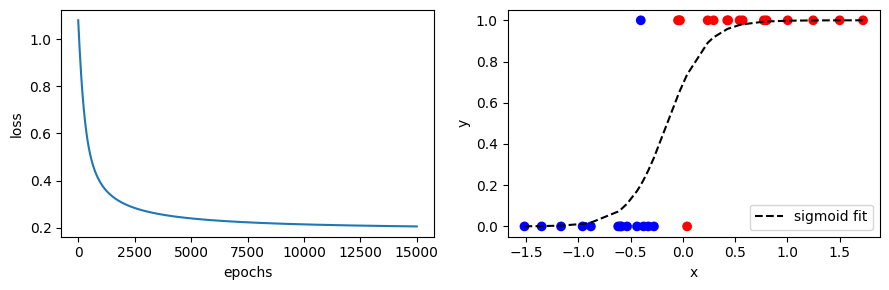

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].plot(loss_history)
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")

yhat = sigmoid(model(x).detach().numpy())
ax[1].scatter(x, y, c=yhat>=0.5, cmap="bwr")
ax[1].plot(x, yhat, "k--", label="sigmoid fit")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].legend(loc="lower right")

fig.tight_layout()

## Adding a second feature

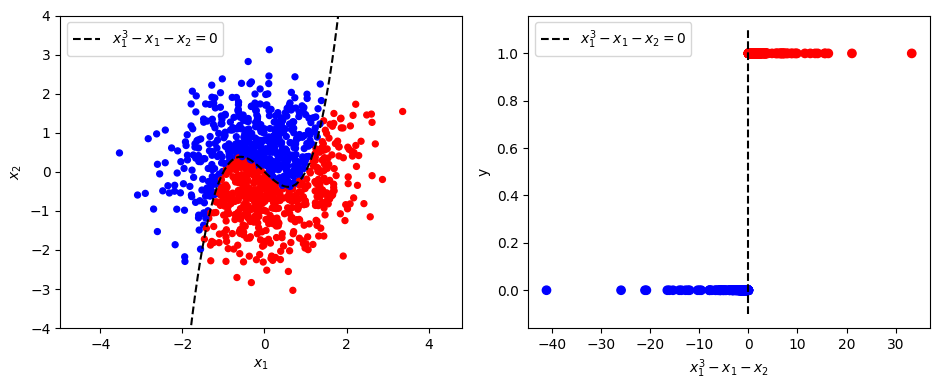

In [12]:
n = 1000
X = np.random.normal(size=(n, 2))
y = X[:, 1] < (X[:, 0] ** 3) - X[:, 0]

fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))

ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", s=18)
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$x_2$")
x_span = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 1000)
ax[0].plot(x_span, x_span ** 3 - x_span, "k--", label="$x_1^3 - x_1 - x_2 = 0$")
ax[0].set_ylim([-4, 4])
ax[0].legend()

z = X[:, 0] ** 3 - X[:, 0] - X[:, 1]
ax[1].scatter(z, y, c=y, cmap="bwr")
ax[1].plot([0, 0], [-0.1, 1.1], "k--", label="$x_1^3 - x_1 - x_2 = 0$")
ax[1].legend()
ax[1].set_xlabel("$x_1^3 - x_1 - x_2$")
ax[1].set_ylabel("y")

fig.tight_layout()

## Pytorch 2-input Logistic Regression Network

In [13]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=1),  # 2 input features now (x_1, x_2)
    # Sigmoid (applied in loss_fn)
)

loss_fn = nn.BCEWithLogitsLoss()
# Reminder: BCEWithLogitsLoss both applies sigmoid to the output and computes the loss

## What type of decision boundary can this network fit?

a) Linear

b) Non-linear

Reminder: We've added a non-linear activation function (sigmoid)

## Result

In [14]:
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
y = y[:, None]

In [15]:
def plot_decision_boundary(
    dataset,
    labels,
    model,
    steps=1000,
    cmap="bwr",
    ax=None,
    show_data=True,
    show_actual=True,
    title="Decision Boundary Fit",
    xlim=None,
    ylim=None,
    xlabel="$x_1$",
    ylabel="$x_2$"
):
    """
    Adapted from:
    https://gist.github.com/erwan-simon/e3baef06a00bb9a39a6968acf78121ee
    """
    # Define region of interest by data limits
    if xlim:
        xmin, xmax = xlim
    else:
        xmin, xmax = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
    if ylim:
        ymin, ymax = ylim
    else:
        ymin, ymax = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions
    labels_predicted = model(
        torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float)
    )
    labels_predicted = sigmoid(labels_predicted.detach().numpy())

    # Plot decision boundary
    #labels_predicted = [0 if value <= 0.5 else 1 for value in labels_predicted]
    z = np.array(labels_predicted).reshape(xx.shape)

    if ax is None:
        fig, ax = plt.subplots()

    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.25, vmin=0, vmax=1)

    # plot data
    if show_data:
        ax.scatter(
            dataset[:, 0],
            dataset[:, 1],
            c=labels.reshape(labels.size()[0]),
            cmap=cmap,
            lw=0,
            marker="."
        )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if not show_data and show_actual:
        ax.plot(x_span, x_span ** 3 - x_span, "k--", label="actual")
        ax.set_ylim([ymin, ymax])
        ax.legend()


def show_result(X, y, model, loss_history, print_weights=True):
    if print_weights:
        for name, param in model.named_parameters():
            print(f"Layer: {name} | Size: {param.size()} | Values : {param[:]} \n")

    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].plot(loss_history)
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel("loss")
    plot_decision_boundary(X, y, model, ax=ax[1], show_data=False)
    plot_decision_boundary(X, y, model, ax=ax[2], show_data=True, title="Data")
    fig.tight_layout()

Done!
Layer: 0.weight | Size: torch.Size([1, 2]) | Values : tensor([[ 1.4129, -2.8538]], grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([1]) | Values : tensor([0.0429], grad_fn=<SliceBackward0>) 



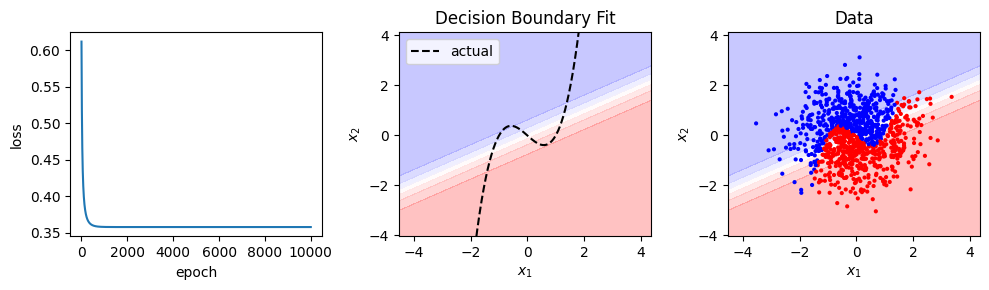

In [16]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
model, loss_history = train(X, y, model, loss_fn, optimizer, 10000)

show_result(X, y, model, loss_history)

## Adding nodes and layers


### 1 Hidden Layer

Done!
Layer: 0.weight | Size: torch.Size([2, 2]) | Values : tensor([[-11.3679, -10.0238],
        [  1.4155,  -0.6458]], grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([2]) | Values : tensor([ 0.0810, -0.2188], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([1, 2]) | Values : tensor([[14.0531, 24.8474]], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([1]) | Values : tensor([-18.5659], grad_fn=<SliceBackward0>) 



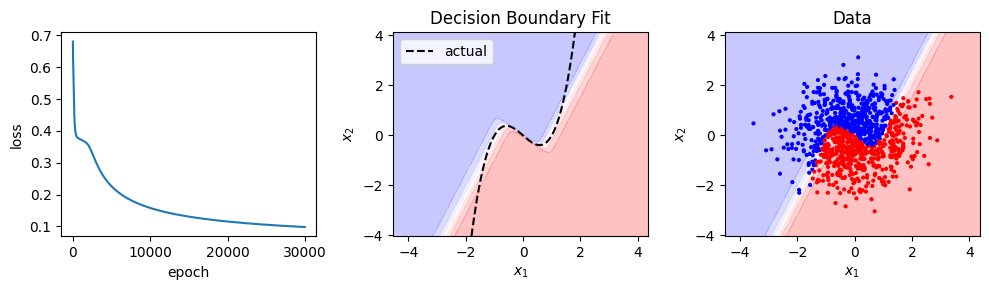

In [17]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1),
    # Sigmoid (applied in loss_fn)
)

learning_rate = 0.2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
model, loss_history = train(X, y, model, loss_fn, optimizer, 30000)

show_result(X, y, model, loss_history)

### 2 Hidden Layers

Done!


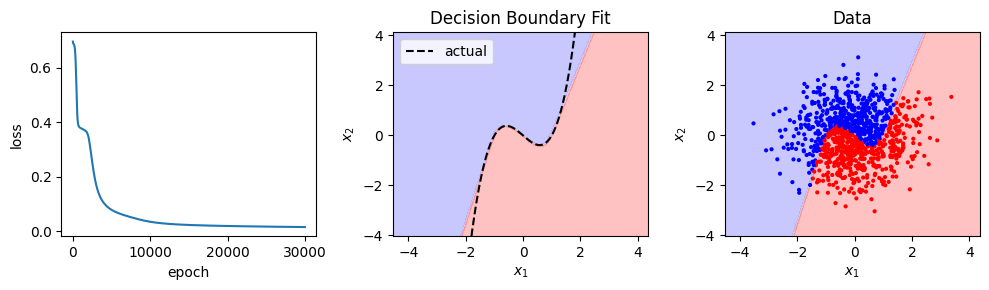

In [18]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=3),
    nn.Sigmoid(),
    nn.Linear(in_features=3, out_features=3),
    nn.Sigmoid(),
    nn.Linear(in_features=3, out_features=1),
    # Sigmoid (applied in loss_fn)
)

learning_rate = 0.2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
model, loss_history = train(X, y, model, loss_fn, optimizer, 30000)

show_result(X, y, model, loss_history, print_weights=False)

## What's going on?

Back to the one hidden layer network:

In [19]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1),
    # Sigmoid (applied in loss_fn)
)

learning_rate = 0.2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
model, loss_history = train(X, y, model, loss_fn, optimizer, 30000)

Done!


/var/folders/xv/d5nvn2ps5r3fcf276w707n01qdmpqf/T/ipykernel_89756/1702624272.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


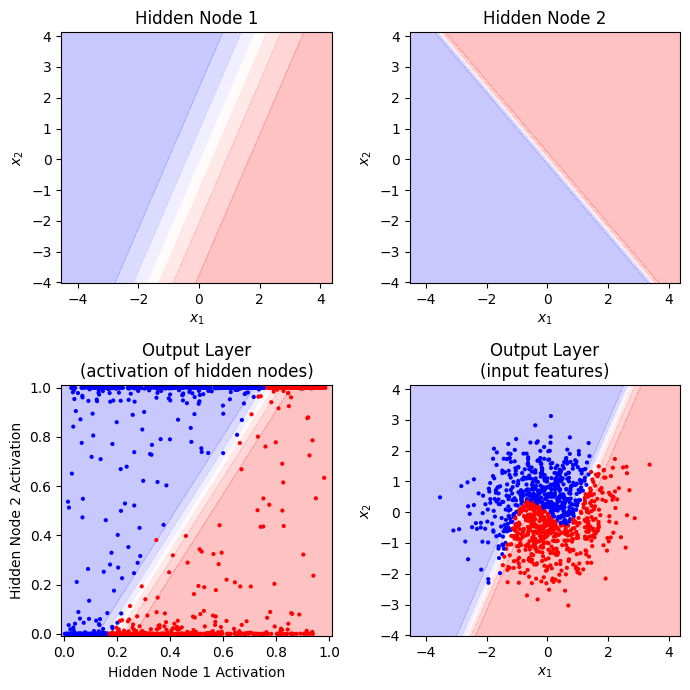

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

w00 = model[0].weight[0]
b00 = model[0].bias[0]
fn00 = lambda x: (w00 * x + b00).sum(axis=1)
g00 = sigmoid(fn00(X).detach())

plot_decision_boundary(
    X, y, fn00, show_data=False, show_actual=False, ax=ax[0][0], title="Hidden Node 1"
)


w01 = model[0].weight[1]
b01 = model[0].bias[1]
fn01 = lambda x: (w01 * x + b01).sum(axis=1)
g01 = sigmoid(fn01(X).detach())

plot_decision_boundary(
    X, y, fn01, show_data=False, show_actual=False, ax=ax[0][1], title="Hidden Node 2"
)


a1 = np.array([g00.numpy(), g01.numpy()]).T
fn10 = (
    lambda a1: model[2].weight[0][0] * a1[:, 0]
    + model[2].weight[0][1] * a1[:, 1]
    + model[2].bias
)

plot_decision_boundary(
    a1,
    y,
    fn10,
    show_data=True,
    ax=ax[1][0],
    show_actual=False,
    xlim=(-0.01, 1.01),
    ylim=(-0.01, 1.01),
    title="Output Layer\n(activation of hidden nodes)",
    xlabel="Hidden Node 1 Activation",
    ylabel="Hidden Node 2 Activation",
)


plot_decision_boundary(
    X,
    y,
    model,
    show_data=True,
    show_actual=False,
    ax=ax[1][1],
    title="Output Layer\n(input features)",
)

fig.tight_layout()